#**Task 1**
##**Author**: Sricharan R

##**Task description**:
The "**Diabetes Disease Dataset(of only females)**" contains numrical attributes such as pregnancies,glucose,Blood pressure,skin thickness,insulin,BMI,Age,etc.
This dataset is used to make a supervised learning model which interprets the data and for the statistical visualisation from the given data.


##Importing modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

##Reading Diabetes Dataset

In [4]:
data = pd.read_csv('diabetes.csv')

In [23]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
0,12,92,62,7,258,0.926,44,1
1,2,112,86,42,160,0.246,28,0
2,0,67,76,0,0,0.194,46,0
3,6,102,82,0,0,0.180,36,1
4,2,112,78,50,140,0.175,24,0


##Randomising the Dataset

In [5]:
data = data.sample(frac=1).reset_index(drop=True)
data = data.drop(columns='BMI')

## Data Description

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
0,12,92,62,7,258,0.926,44,1
1,2,112,86,42,160,0.246,28,0
2,0,67,76,0,0,0.194,46,0
3,6,102,82,0,0,0.180,36,1
4,2,112,78,50,140,0.175,24,0


In [7]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
763,0,119,64,18,92,0.725,23,0
764,3,150,76,0,0,0.207,37,0
765,1,79,80,25,37,0.583,22,0
766,1,82,64,13,95,0.415,23,0
767,3,130,78,23,79,0.323,34,1


In [8]:
data.nunique() # for unique values

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [9]:
data.shape # for the shape of the dataset

(768, 8)

In [10]:
data.isnull().sum() #To check for the null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
print(data.groupby(["Pregnancies"]).size())

Pregnancies
0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
dtype: int64


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 48.1 KB


In [13]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,2.420000,81.000000,1.000000


##Exploring Data Analysis

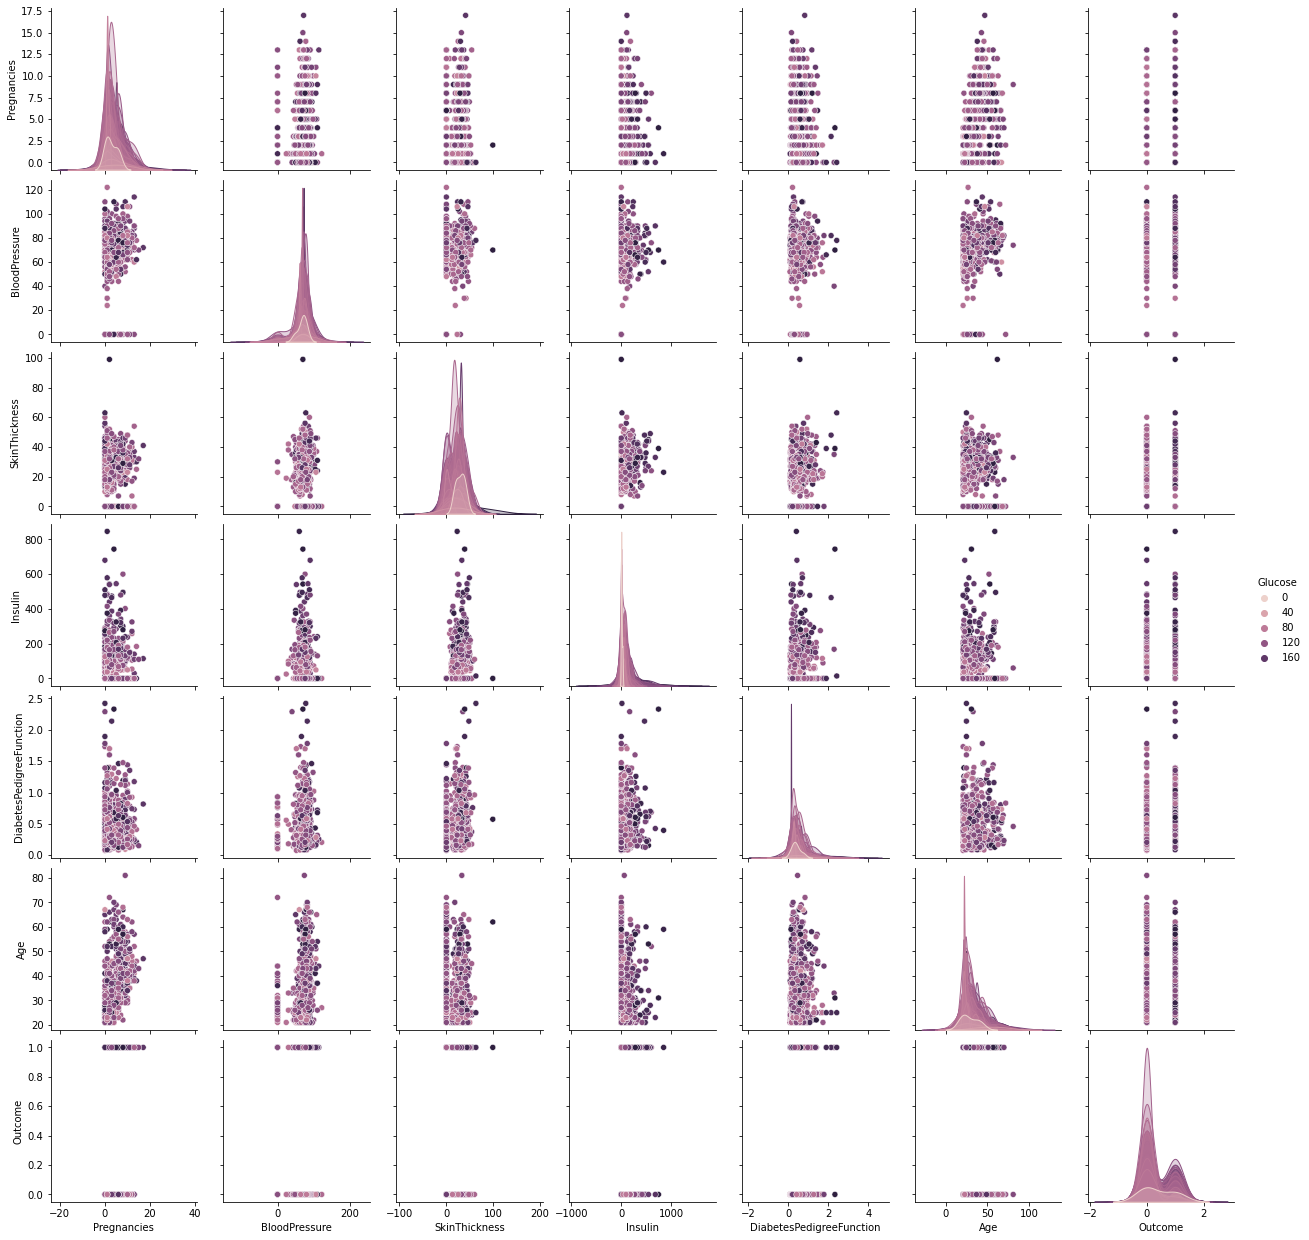

In [14]:
sns.pairplot(data, hue='Glucose')

##Correlation Matrix

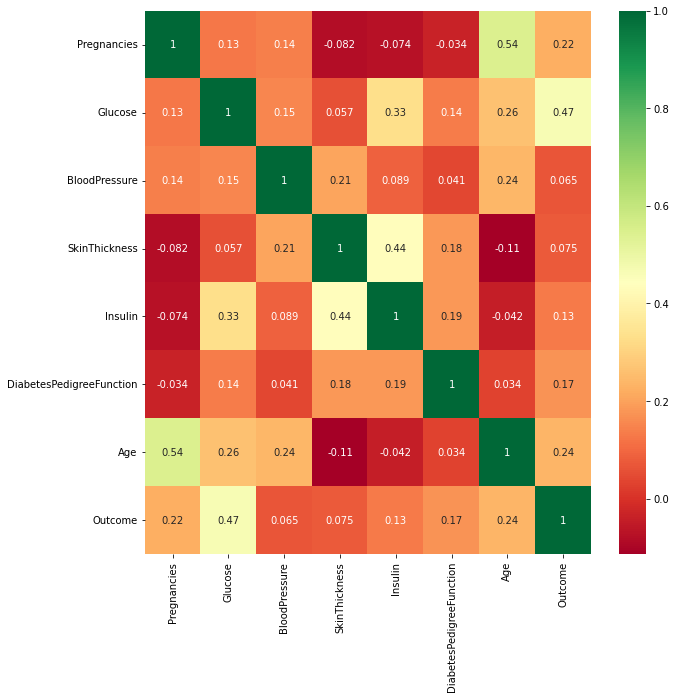

In [15]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heatmap
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")

##Histogram of Features

Blood Pressure and Glucose

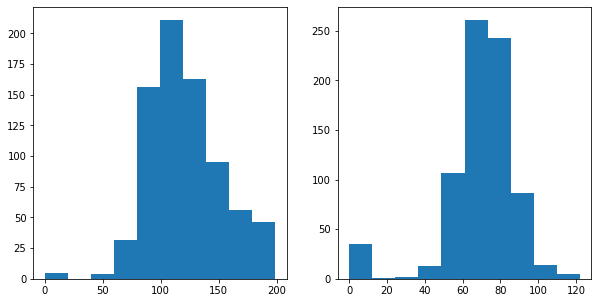

In [16]:
fig1 = plt.figure(figsize=(10, 5))
f1 = fig1.add_subplot(121)
f2 = fig1.add_subplot(122)
f1.hist(data['Glucose'])
f2.hist(data['BloodPressure'])
plt.show()

SkinThickness and DiabetesPedigreeFunction

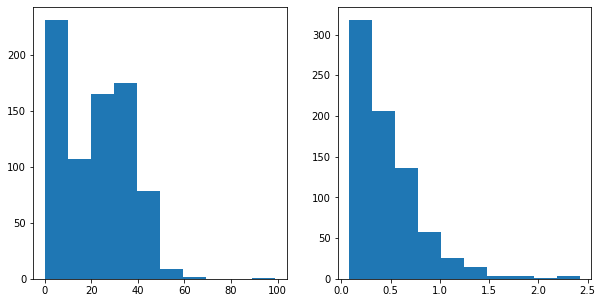

In [19]:
fig2 = plt.figure(figsize=(10, 5))
f1 = fig2.add_subplot(121)
f2 = fig2.add_subplot(122)
f1.hist(data['SkinThickness'])
f2.hist(data['DiabetesPedigreeFunction'])
plt.show()

##Boxplots of features

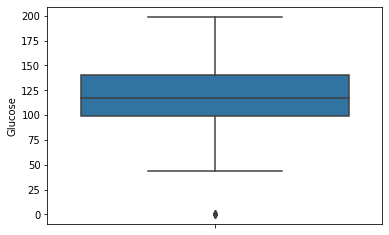

In [20]:
sns.boxplot(y='Glucose',data=data)

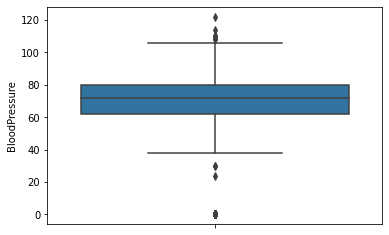

In [21]:
sns.boxplot(y='BloodPressure',data=data)

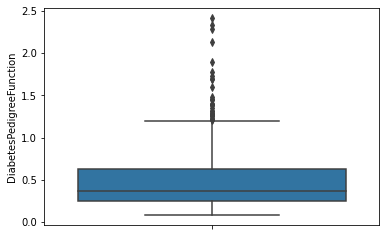

In [25]:
sns.boxplot(y='DiabetesPedigreeFunction',data=data)

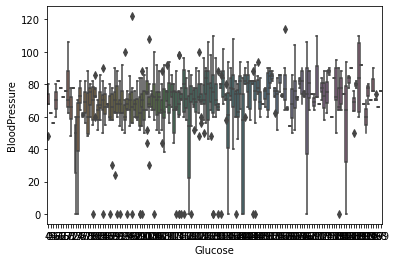

In [26]:
sns.boxplot(x='Glucose', y='BloodPressure',data=data)

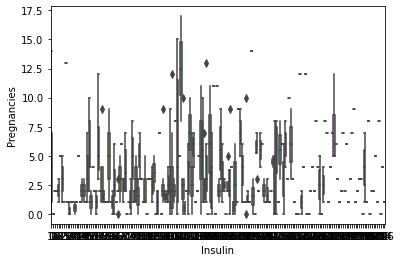

In [27]:
sns.boxplot(x='Insulin', y='Pregnancies',data=data)

##Data Splitting

In [28]:
X = data.iloc[:,0:4]
Y = data['Insulin']

In [29]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness
0,12,92,62,7
1,2,112,86,42
2,0,67,76,0
3,6,102,82,0
4,2,112,78,50


In [30]:
Y.head()

0    258
1    160
2      0
3      0
4    140
Name: Insulin, dtype: int64

##Feature importance

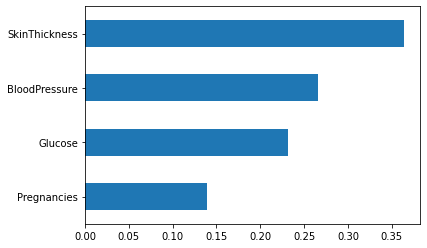

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
fmodel = ExtraTreesClassifier()
fmodel.fit(X,Y)
feat_importances = pd.Series(sorted(fmodel.feature_importances_), index= X.columns)
feat_importances.plot(kind='barh')
plt.show()

##Label encoder

In [32]:
le = LabelEncoder()
Y = le.fit_transform(Y)

##Training model

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size=0.8, random_state=1)

In [35]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

## Performance Evaluation

In [37]:
from sklearn.metrics import accuracy_score
pred = rf.predict(X_test)
print("Accuracy:",round(accuracy_score(Y_test, pred),5)*100,"%")

Accuracy: 44.156 %


##Confusion Matrix

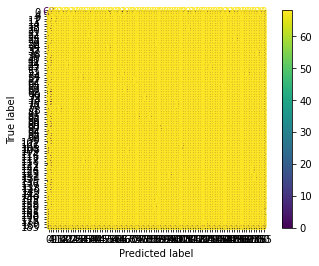

In [38]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, Y_test)  
plt.show()